## Fitting Ne lines in a loop
- This notebook shows how to fit all lines in a folder defined by path
- You tweak the fit for a single line, and then use this to fit all lines. You can then refit lines with high residuals/offsets differing from the rest

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
![image.png](attachment:5a0e0d97-4380-4cb2-bf26-d0ab6ee7458a.png)

In [1]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.11.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.12dev'

## Get Ne line positions for your specific laser wavelength
- At the moment, this returns any Ne lines with intensity >2000 in the NIST databook, although you can change this!

In [5]:
wavelength =532.129 # Specify the specific wavelength of your laser 
df_Ne=pf.calculate_Ne_line_positions(wavelength=wavelength, cut_off_intensity=2000)
df_Ne.head()

,Raman_shift (cm-1),Intensity,Ne emission line in air
1,815.767874,5000.0,556.27662
9,1114.155338,5000.0,565.66588
16,1307.548556,5000.0,571.92248
19,1395.983484,5000.0,574.82985
23,1444.632973,7000.0,576.44188


## Calculate the ideal distance between the two lines you are selecting
- This finds the closest line in the table above for the line shift you have written down

In [6]:
ideal_split=pf.calculate_Ne_splitting(wavelength=wavelength, 
                                      line1_shift=1117, line2_shift=1447,
                                     cut_off_intensity=2000)

## Find your files

In [9]:
mypath=r'G:\My Drive\Berkeley_NEW\DiadFit_outer\docs\Examples\Weak_Diad_BenBlack'
filetype='head_csv'
# Put the common string you can in all your Ne lines here
ID_str='Ne'
file_ext='csv' # Will only take files of this type 
exclude_str='png' # Will exclude files of this type, sometimes images have same name
prefix=None # Leave as none unless witec appended a number
Ne_files=pf.get_Ne_files(path=mypath, file_ext=file_ext, ID_str=ID_str, exclude_str=exclude_str, sort=True)

In [10]:
Ne_files

['000_Ne_1.csv',
 '003_Ne_02.csv',
 '003_Ne_03.csv',
 '003_Ne_2.csv',
 '005_Ne_3.csv',
 '007_Ne_4.csv',
 '009_Ne_5.csv']

## Select the first file you want to fit
- You can either do this numerically, or by specifiying the filename between ''

In [11]:
filename=Ne_files[0]  # Or you could put a string here, like 'NE1.txt' 

## Plot Ne lines to inspect

Biggest 6 peaks:


,pos,height
48,1444.865954,14678.666990
43,1395.931204,4309.000000
61,1564.355687,3415.000000
6,1114.485016,2061.000000
24,1217.296492,1448.666626
32,1307.388779,1227.333374


selected Peak 1 Pos
1114.485016
selected Peak 2 Pos
1444.865954


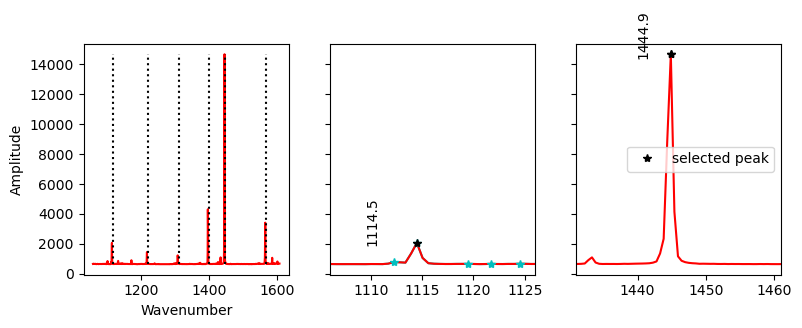

In [12]:
# Specify the approximate peak positions of the lines you are interested in
# If your drift is off the real positions, you'll have to tweak these numbers
peak1_cent=1116
peak2_cent=1446


Ne, df_sort_Ne_trim, nearest_1117, nearest_1447=pf.plot_Ne_lines(path=mypath, filename=filename, filetype=filetype, 
n_peaks=6, peak1_cent=peak1_cent, peak2_cent=peak2_cent,
height=10, threshold=0.6, distance=1, prominence=10, width=1, exclude_range_1=None,
exclude_range_2=None)

## Now tweak the fit for this 1 example
- Most important things, the number of peaks you want for 1117, and the offset for this peak (LH_offset_min)
- By default, the function applies the fit to all the points inside the outermost background positions. This can be trimmed using x_span_pk1_override, and x_span_pk2_override, 

## You can tweak parameters here
- The default parameters may work, you can see what those are here:

In [13]:
pf.Ne_peak_config()

Ne_peak_config(N_poly_pk1_baseline=1, N_poly_pk2_baseline=1, lower_bck_pk1=(-50, -25), upper_bck1_pk1=(8, 15), upper_bck2_pk1=(30, 50), lower_bck_pk2=(-44.2, -22), upper_bck1_pk2=(15, 50), upper_bck2_pk2=(50, 51), x_range_baseline=20, y_range_baseline=200, amplitude=100, x_range_peak=15, x_range_residual=7, LH_offset_mini=(1.5, 3), x_span_pk1=None, x_span_pk2=None)

- You can also overwrite any of these, the most likely things you'll want to overwrite are the background positions, or the amplitude

In [18]:
Ne_Config=pf.Ne_peak_config(amplitude=100, LH_offset_mini=[2, 5], 
lower_bck_pk1=(-50, -30), upper_bck1_pk1=[7, 13], upper_bck2_pk1=[50, 80],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80],
x_range_peak=15, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10])
Ne_Config

Ne_peak_config(N_poly_pk1_baseline=1, N_poly_pk2_baseline=1, lower_bck_pk1=(-50, -30), upper_bck1_pk1=[7, 13], upper_bck2_pk1=[50, 80], lower_bck_pk2=[-40, -30], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80], x_range_baseline=20, y_range_baseline=200, amplitude=100, x_range_peak=15, x_range_residual=7, LH_offset_mini=[2, 5], x_span_pk1=[-10, 8], x_span_pk2=[-10, 10])

first iteration, peak Center=1114.3889
first iteration, peak Amplitude=1729.1371
Trying to place second peak between 1109.39and1112.39
Error bars not determined by function


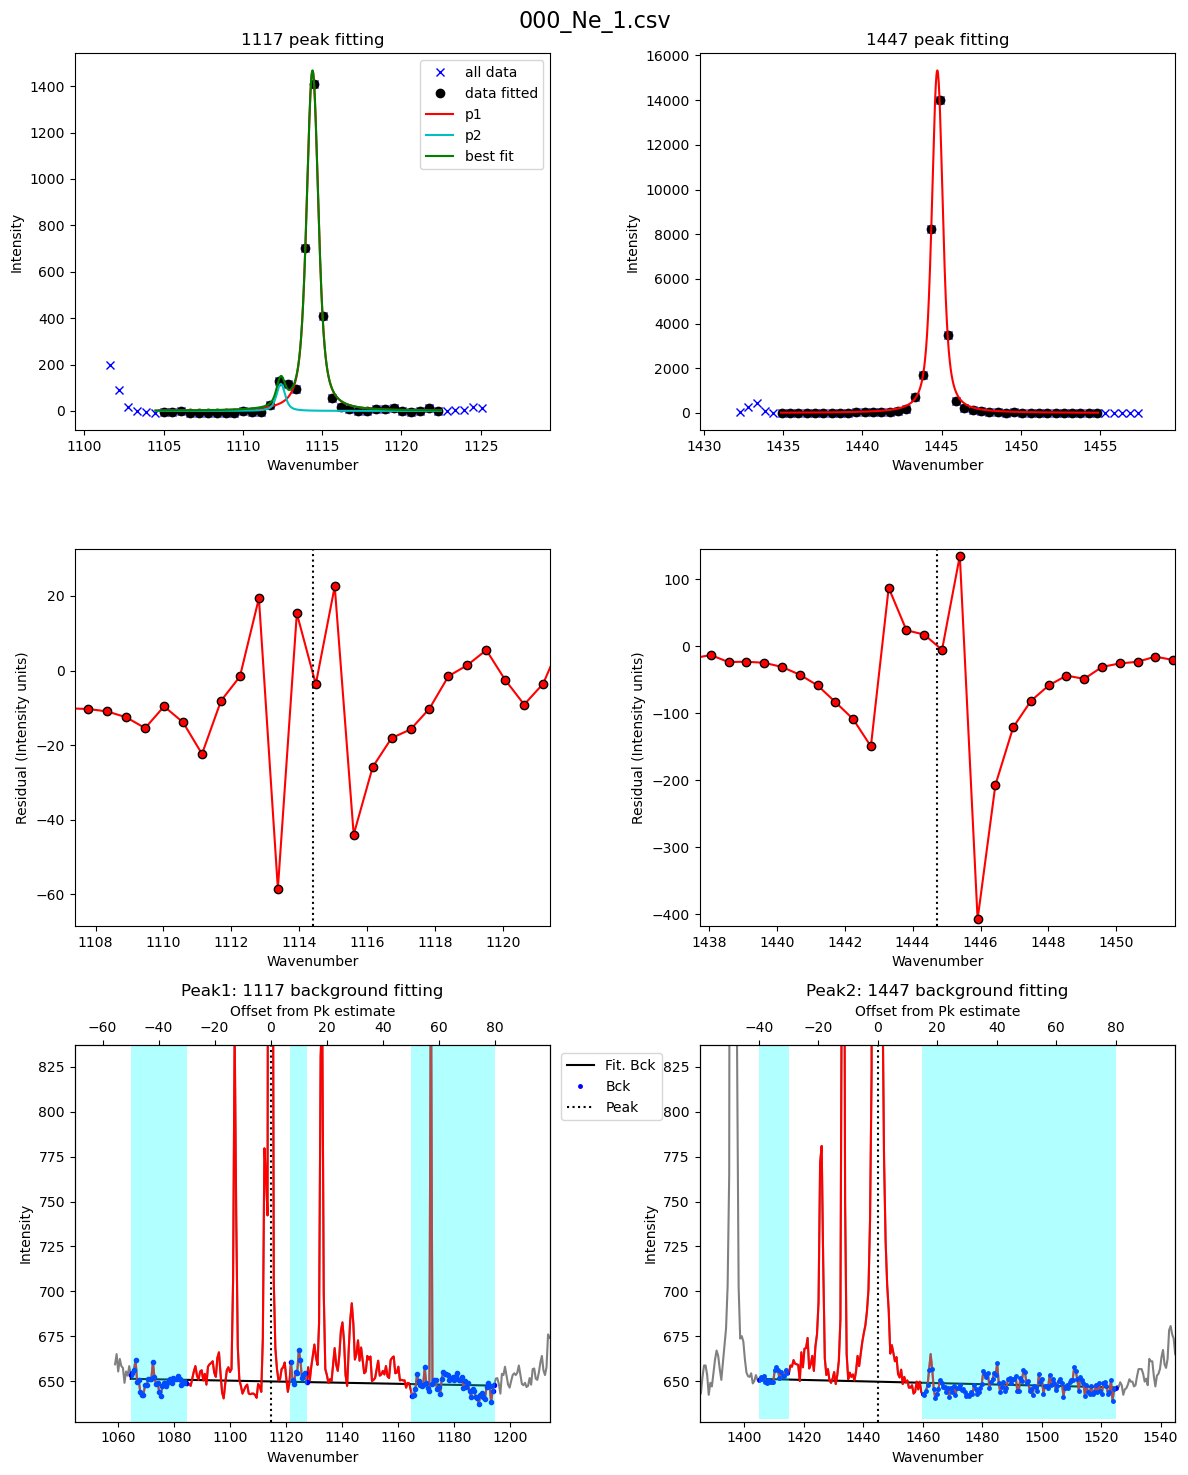

In [19]:
# You also need to set whether you want 1 peak or 2 for the LH diad
peaks_1=2

df_test, Ne_1117_reg_x_plot, Ne_1117_reg_y_plot=pf.fit_Ne_lines(  
    config=Ne_Config, peaks_1=peaks_1,
    Ne=Ne, filename=filename, path=mypath, prefix=prefix,
    Ne_center_1=nearest_1117, Ne_center_2=nearest_1447,
    DeltaNe_ideal=ideal_split['Ne_Split'])                                                                 
                                                                     
        
#config: Ne_peak_config=Ne_peak_config(),

## Now you can loop over all files using these parameters
- Most important thing you can change is plot_figure=False, much quicker, but wont save or show figures, plot_figure=True will)
- If you need, you can add other parameters in the loop here. 

working on 000_Ne_1.csv
first iteration, peak Center=1114.3889
first iteration, peak Amplitude=1729.1371
Trying to place second peak between 1109.39and1112.39
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_36388\843229300.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 003_Ne_02.csv
first iteration, peak Center=1114.0123
first iteration, peak Amplitude=1699.7927
Trying to place second peak between 1109.01and1112.01
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_36388\843229300.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 003_Ne_03.csv
first iteration, peak Center=1114.0123
first iteration, peak Amplitude=1699.7927
Trying to place second peak between 1109.01and1112.01
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_36388\843229300.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 003_Ne_2.csv
first iteration, peak Center=1114.4342
first iteration, peak Amplitude=1677.2665
Trying to place second peak between 1109.43and1112.43
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_36388\843229300.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 005_Ne_3.csv
first iteration, peak Center=1114.4503
first iteration, peak Amplitude=1648.1472
Trying to place second peak between 1109.45and1112.45
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_36388\843229300.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 007_Ne_4.csv
first iteration, peak Center=1114.4537
first iteration, peak Amplitude=1645.8995
Trying to place second peak between 1109.45and1112.45
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_36388\843229300.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 009_Ne_5.csv
first iteration, peak Center=1114.467
first iteration, peak Amplitude=1645.6954
Trying to place second peak between 1109.47and1112.47
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_36388\843229300.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


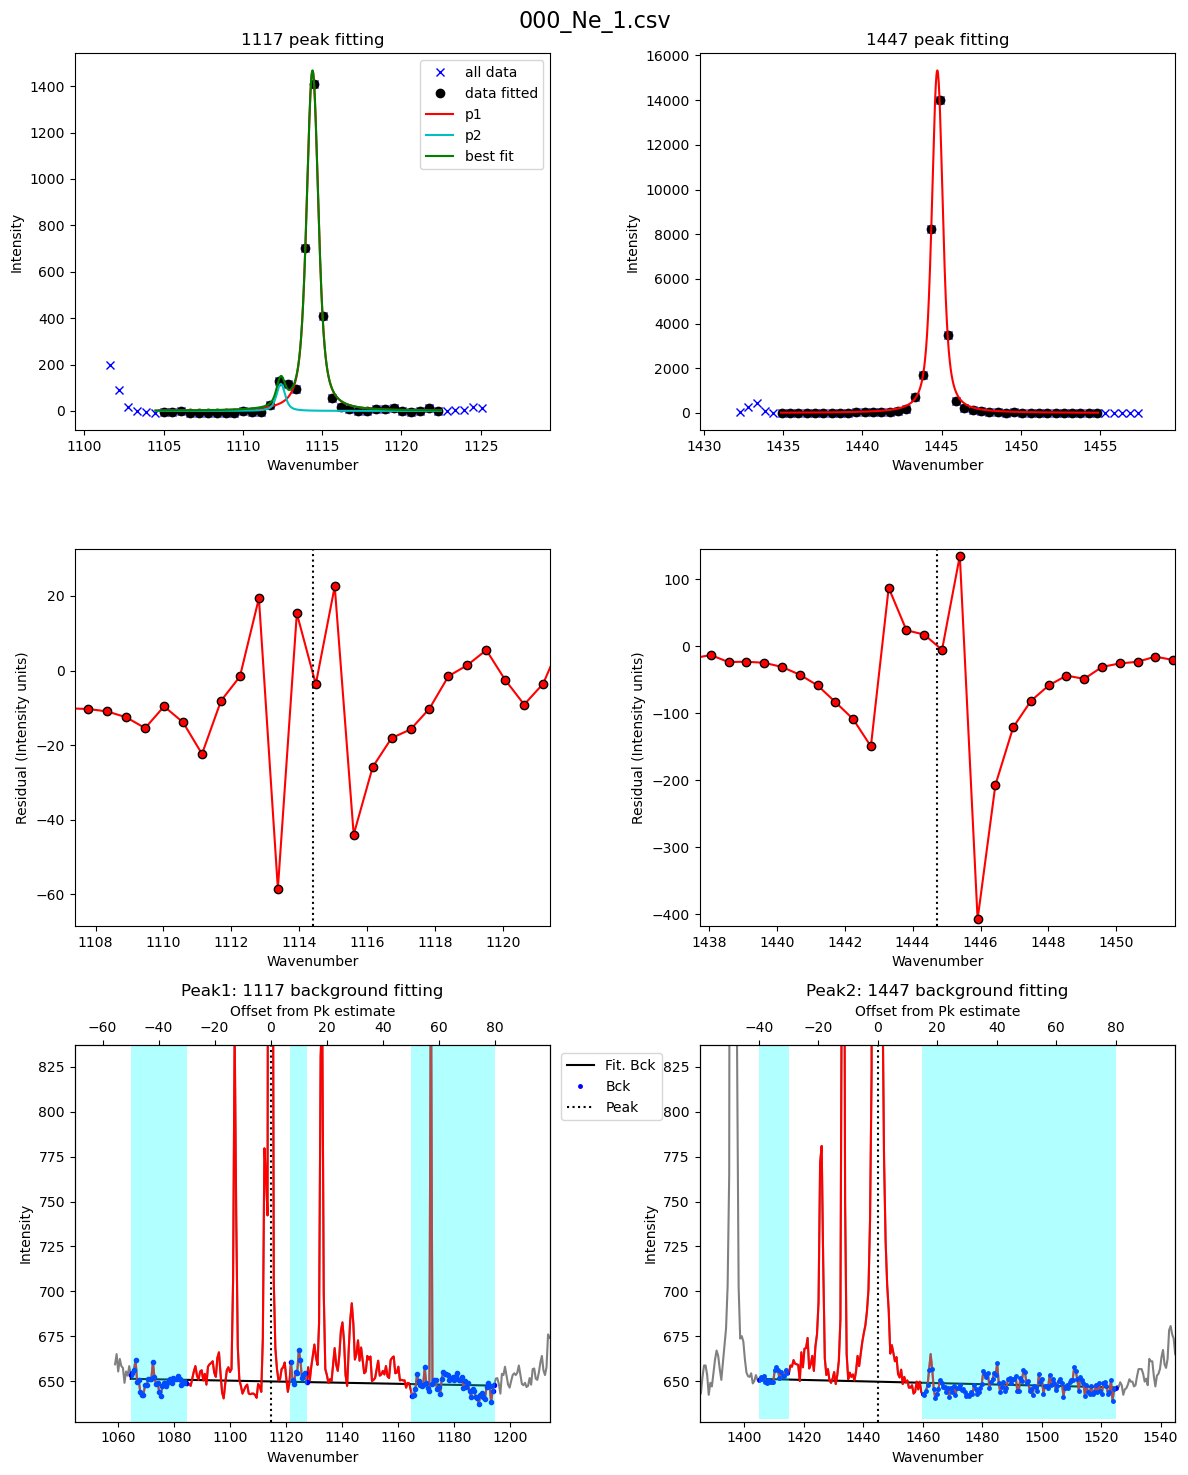

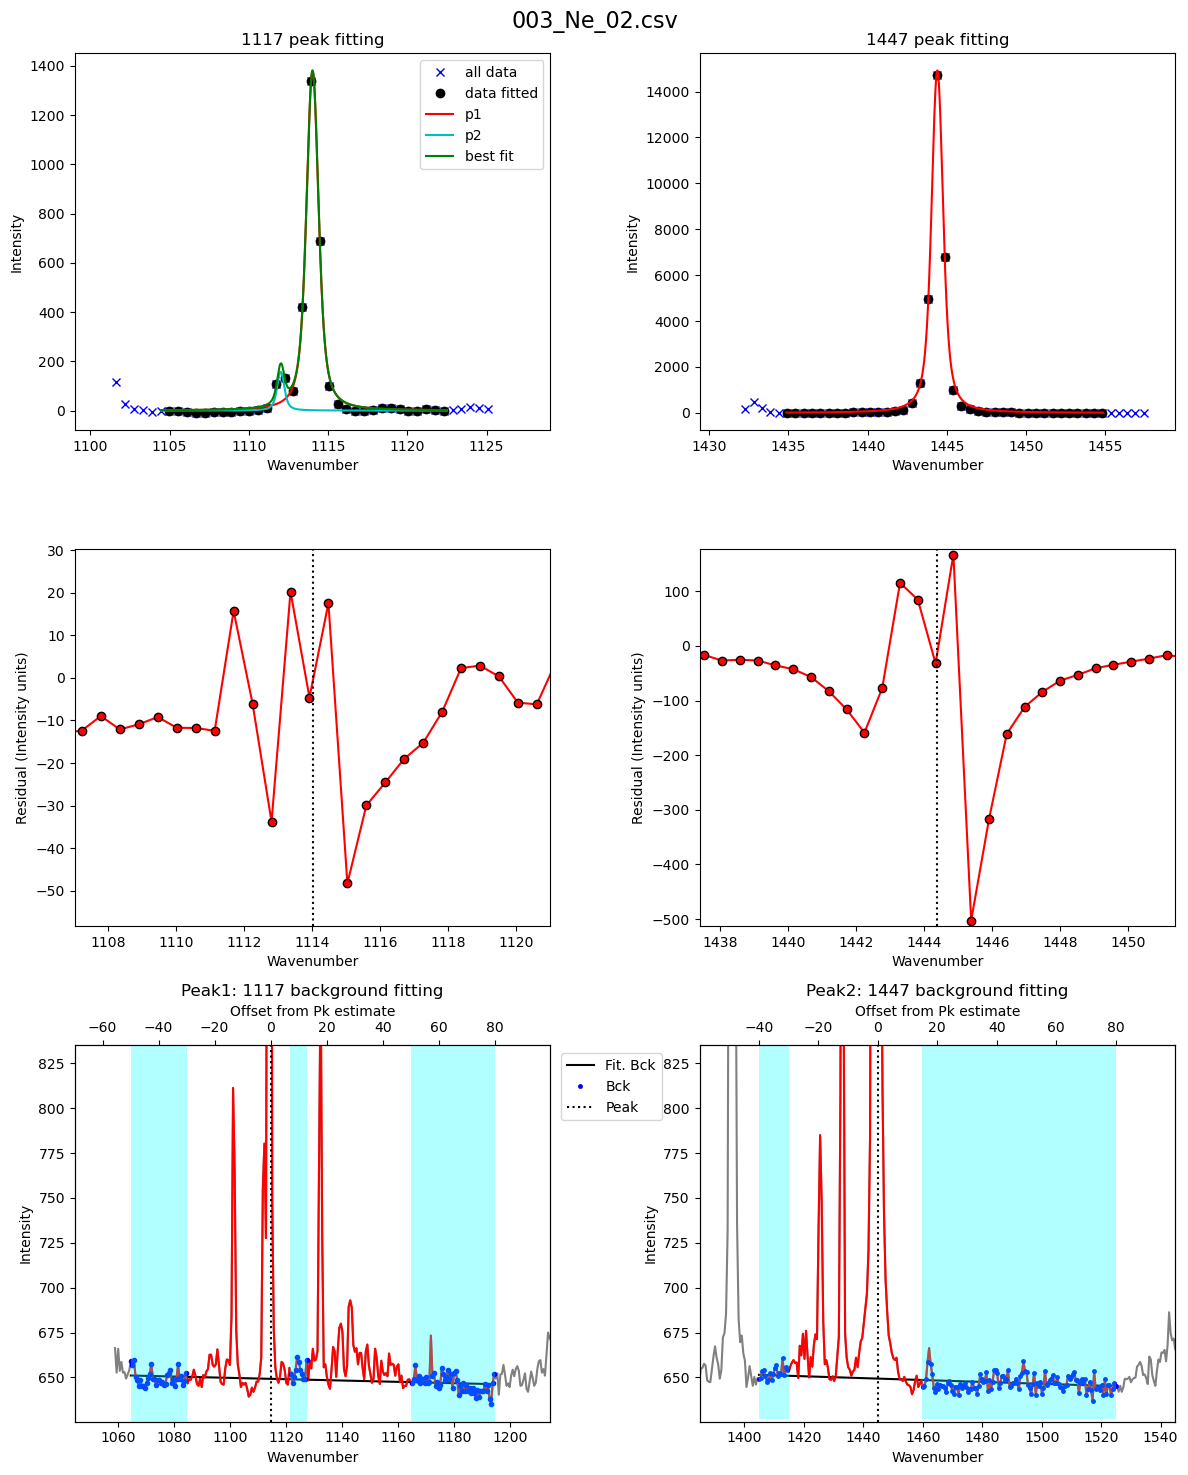

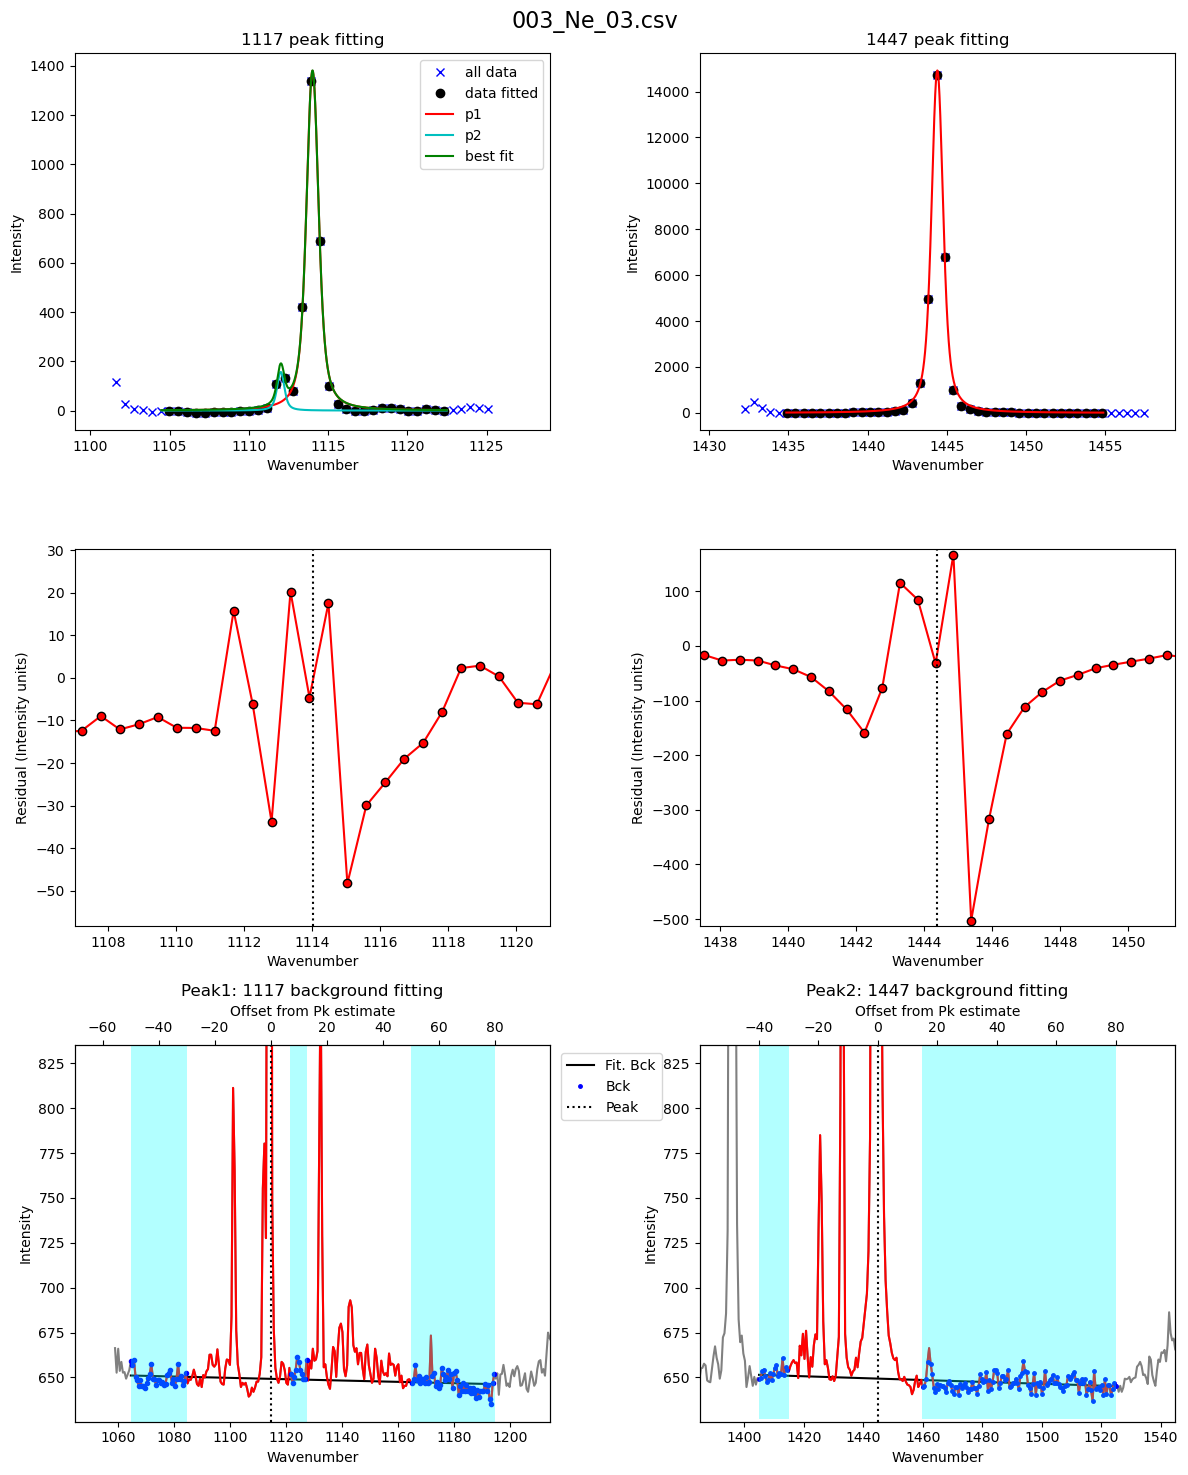

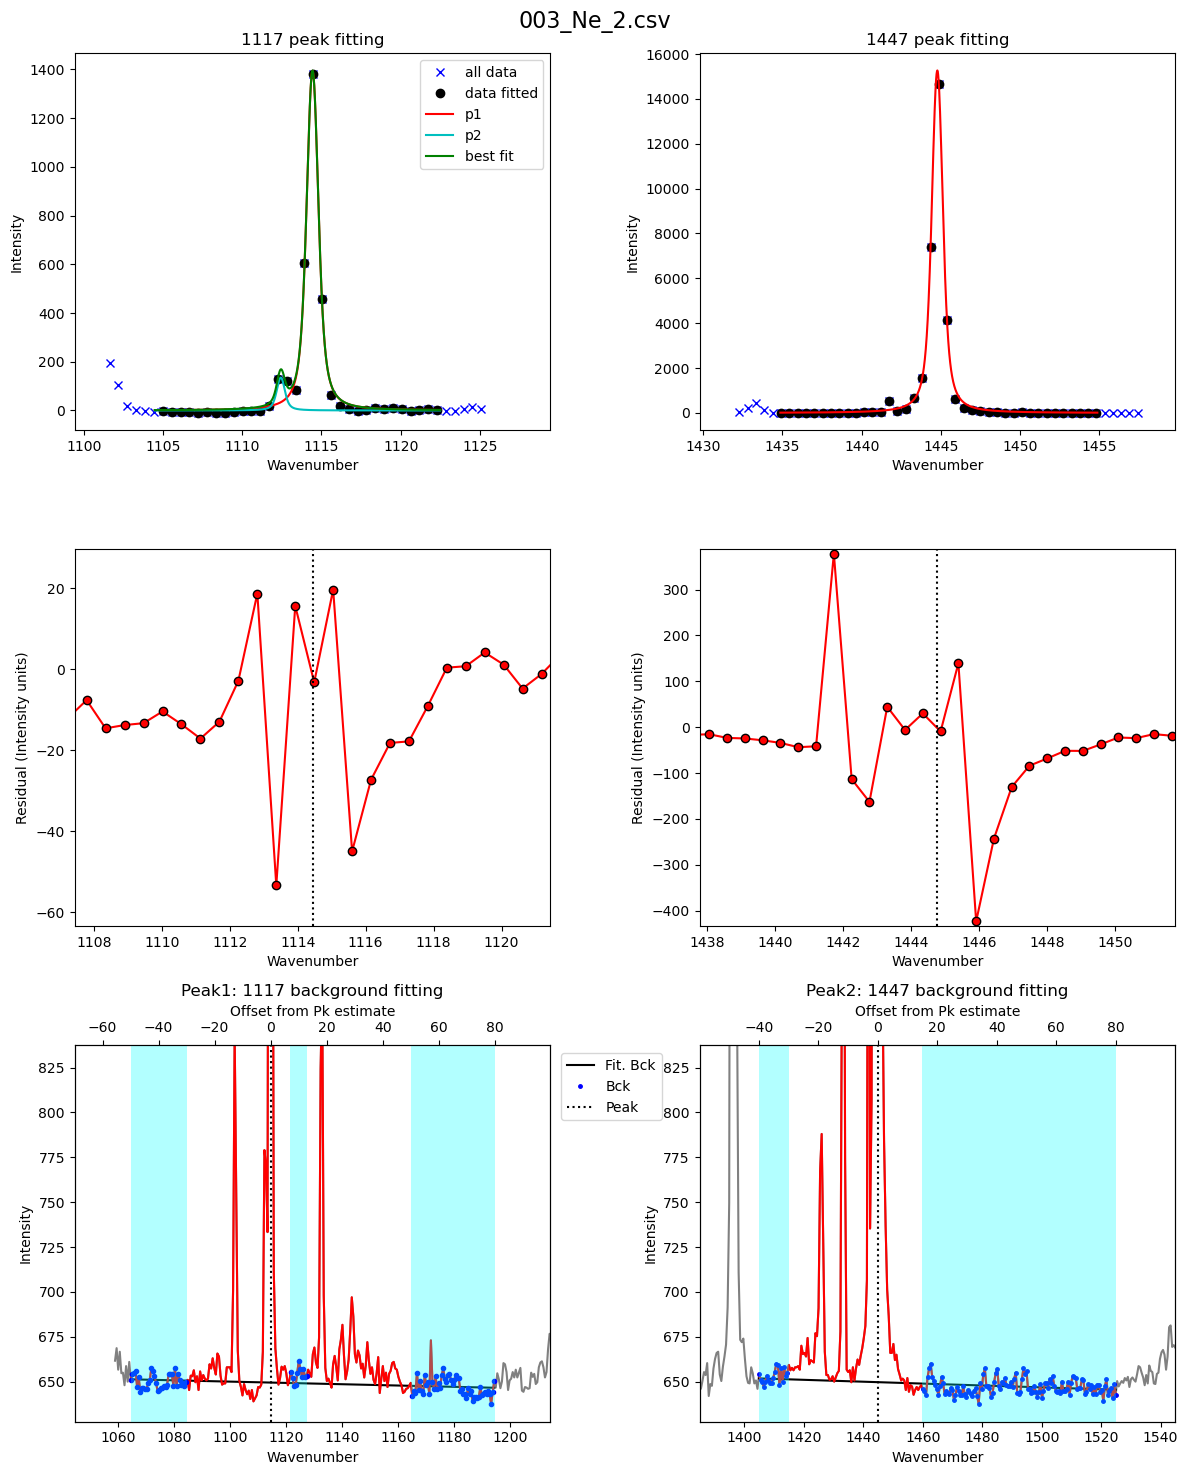

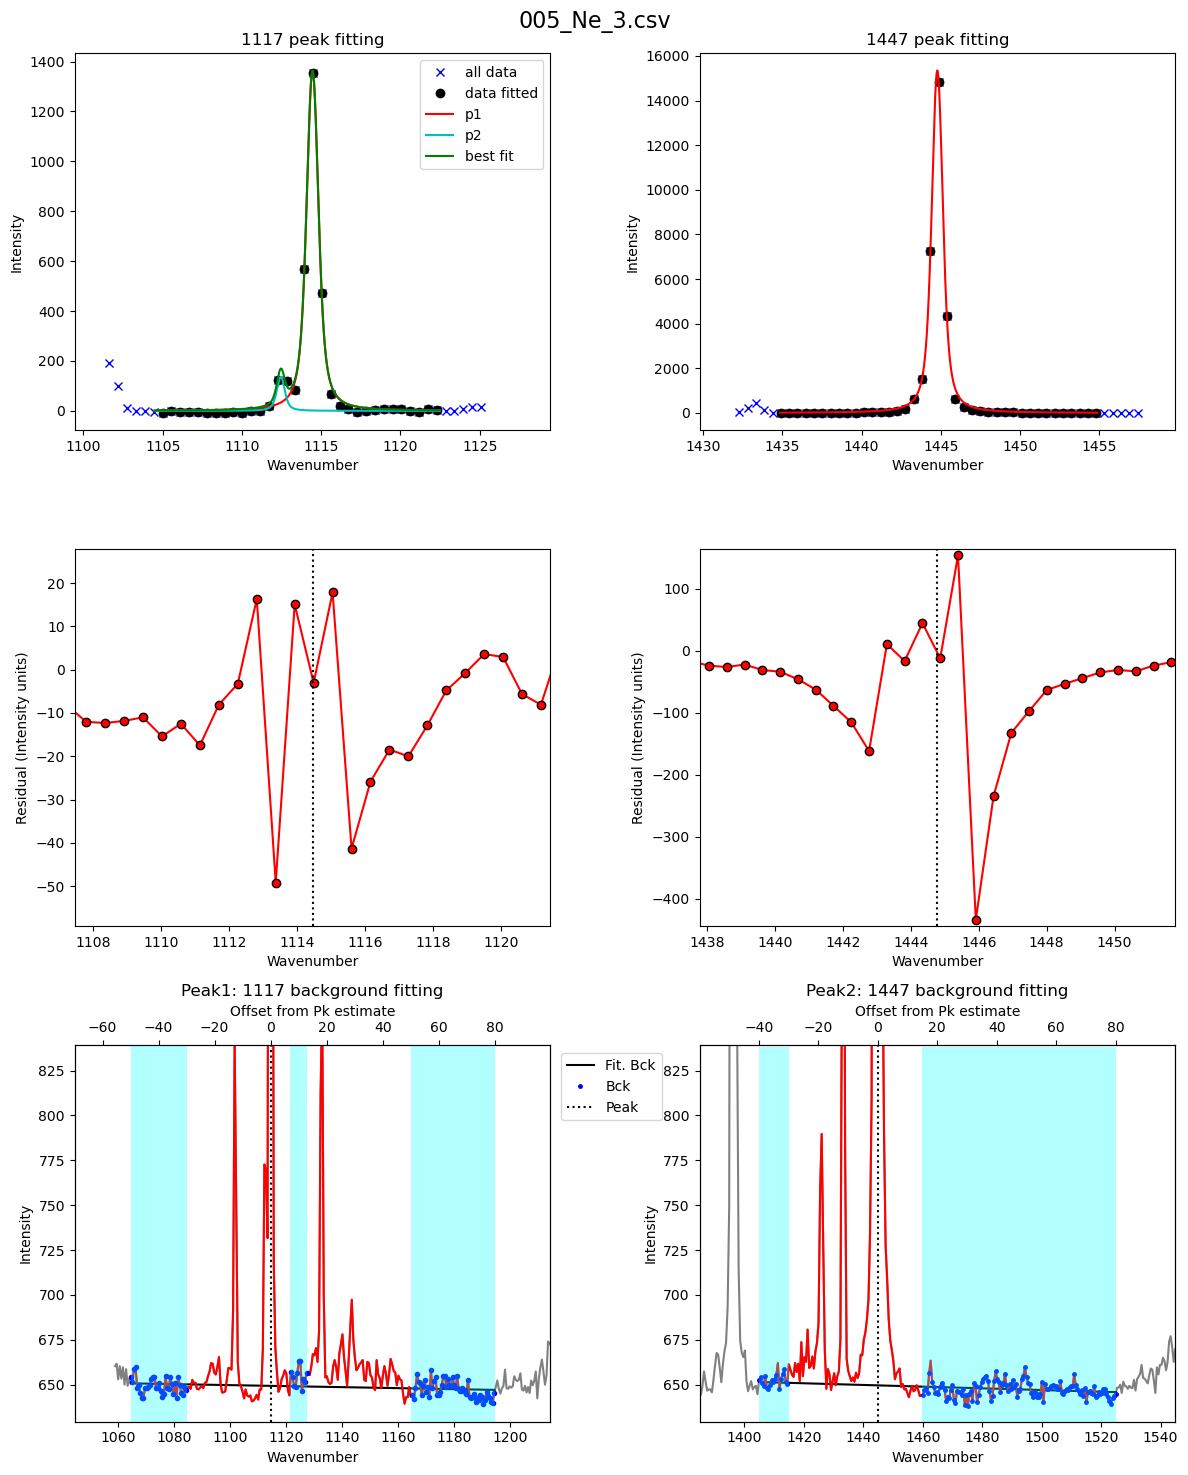

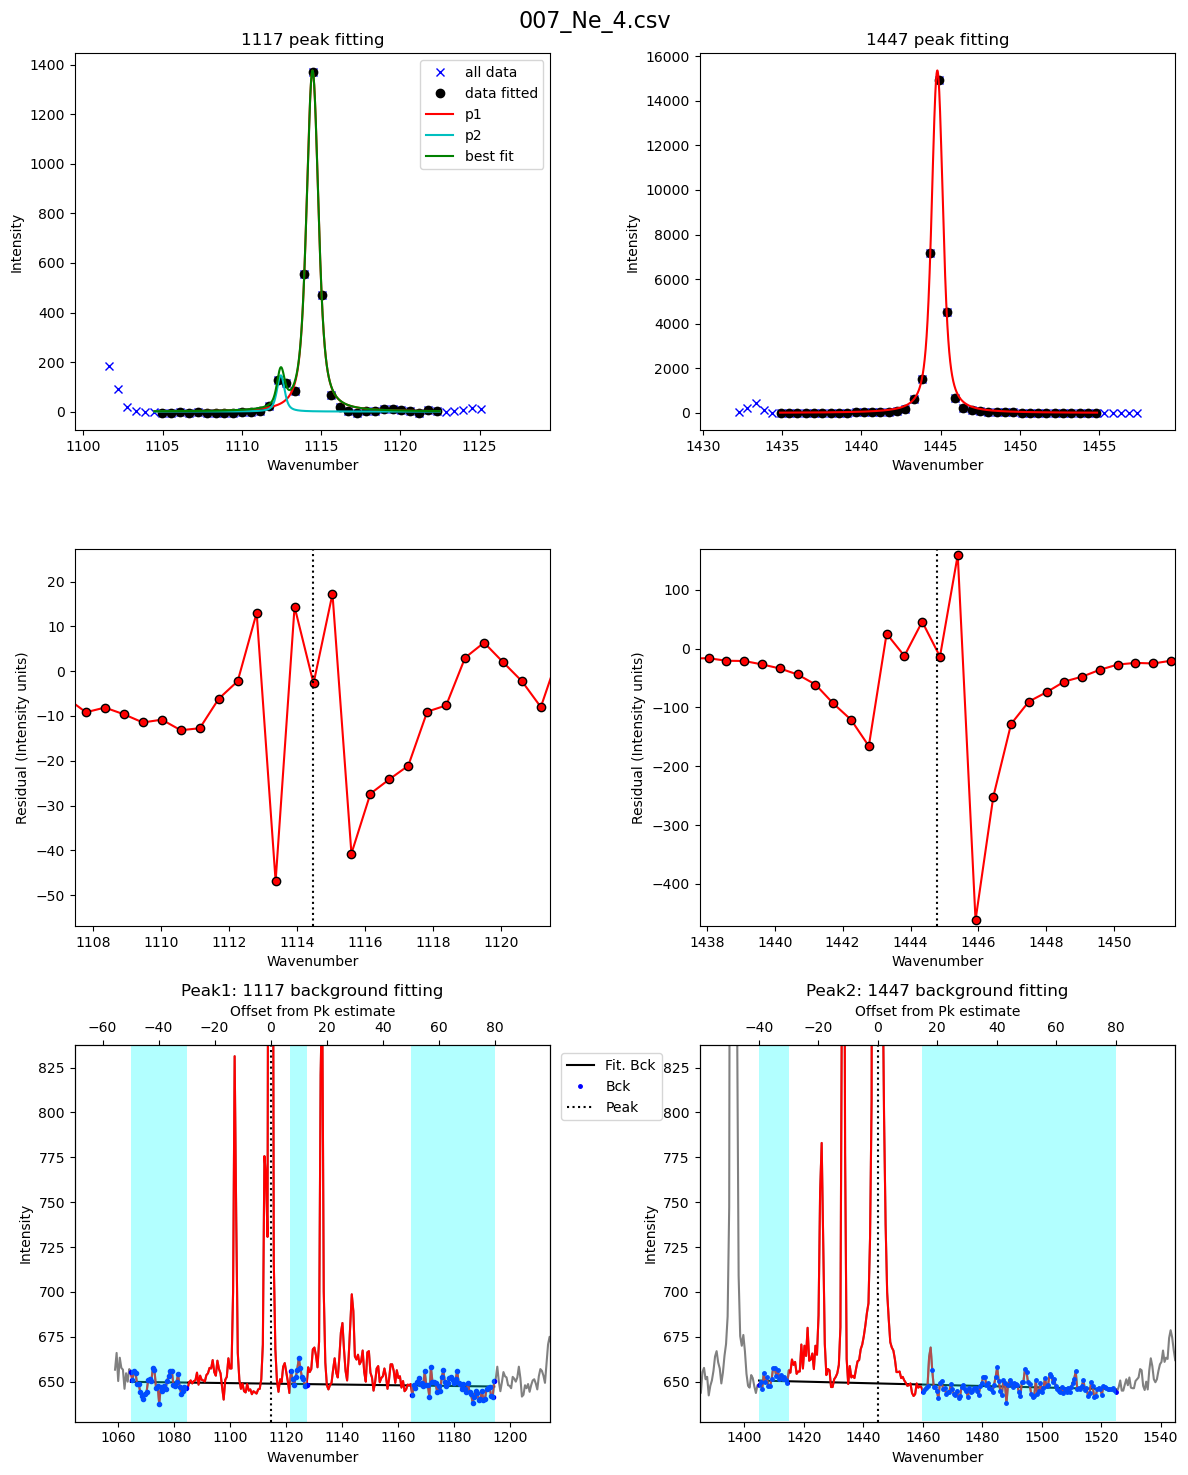

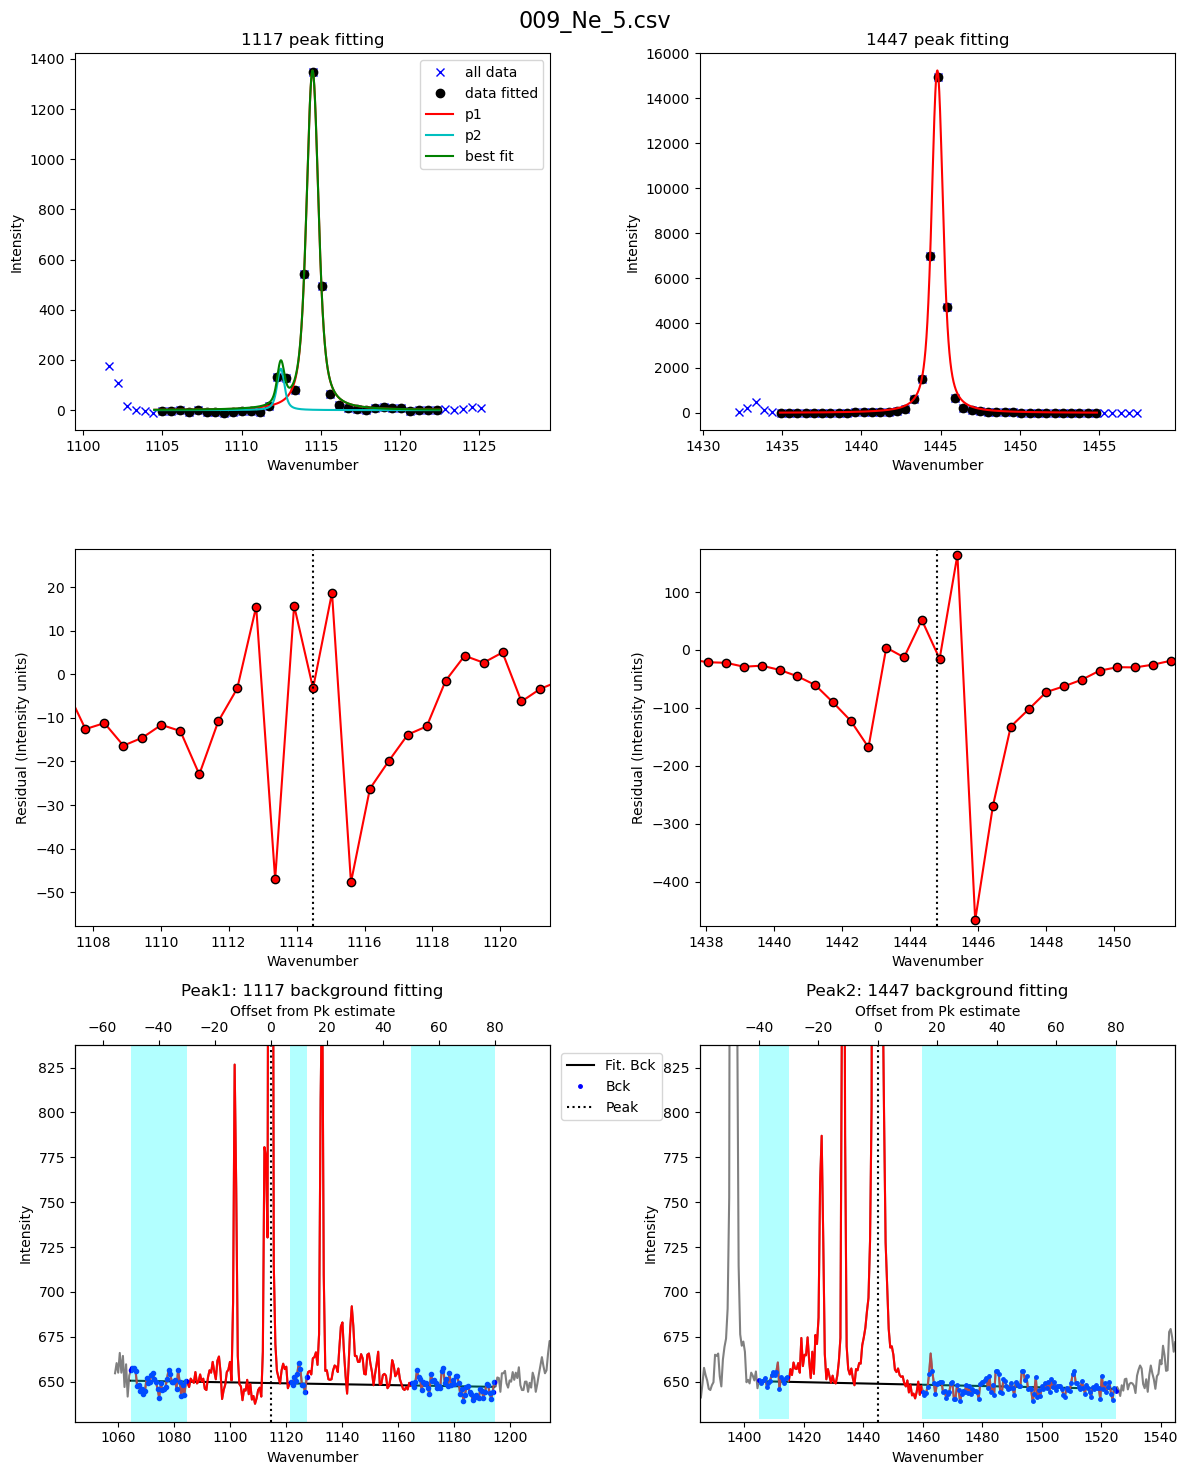

In [20]:
plot_figure=True # Means doesnt make figures, lot faster. 
save_excel=True # Saves to excel
save_clipboard=True # Copies to clipboard

df = pd.DataFrame([])
for i in range(0, len(Ne_files)):
    
    filename=Ne_files[i]
    Ne=pf.get_data(path=mypath, filename=filename, filetype=filetype)
    print('working on ' + str(Ne_files[i]))


    data, Ne_1117_reg_x_plot, Ne_1117_reg_y_plot=pf.fit_Ne_lines(  
    config=Ne_Config, peaks_1=peaks_1,
    Ne=Ne, filename=filename, path=mypath, prefix=prefix,
    Ne_center_1=nearest_1117, Ne_center_2=nearest_1447,
    DeltaNe_ideal=ideal_split['Ne_Split'], plot_figure=plot_figure) 


    df = df.append(data)
df2=df.reset_index(drop=True)

In [29]:
df2.columns

Index(['File_Name', '1447_peak_cent', 'error_1447', '1117_peak_cent',
       'error_1117', 'deltaNe', 'Ne_Corr', 'Ne_Corr_min', 'Ne_Corr_max',
       'residual_1447', 'residual_1117'],
      dtype='object')

In [ ]:
def plot_Ne_corrections(df=None, x_axis=None, marker='o', mec='k',
                       mfc='r'):
    if x_axis is not None:
        x=x_axis
    else:
        x=df.index()
    fig, (ax1, ax2, ax3) = plt.subplots(1, 2, figsize=(10,5))
    ax1.plot(x, df['Ne_Corr'], marker=marker, mec='k', mfc='r')
    ax1.set_ylabel('Ne Correction factor')
    
    ax2.plot(df['residual_1447'], df['Ne_Corr'], marker=marker, mec='k', mfc='r')
    ax2.set_ylabel('Ne Correction factor')
    ax2.set_xlabel('Residual for Peak2')

    ax3.plot(df['residual_1447'], df['Ne_Corr'], marker=marker, mec='k', mfc='r')
    ax3.set_ylabel('Ne Correction factor')
    ax3.set_xlabel('Residual for Peak1')

    
    

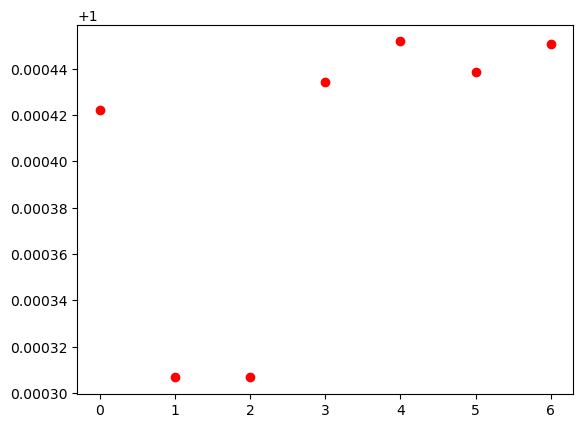

In [24]:
plt.plot(df2.index, df2['Ne_Corr'], 'or')

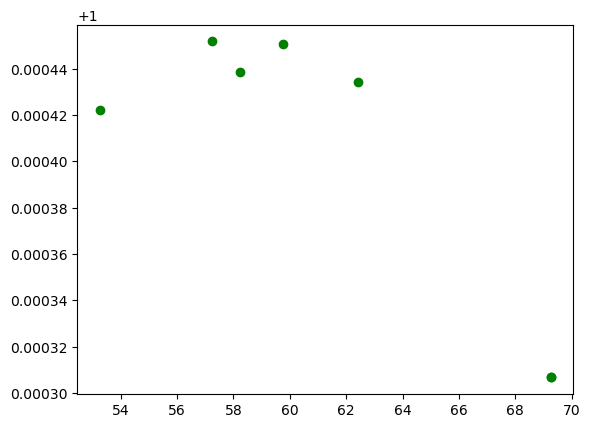

In [28]:
plt.plot(df2['residual_1447'], df2['Ne_Corr'], 'og')